<a href="https://colab.research.google.com/github/soumya-1313/Scikit_learn/blob/main/logistic_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Logistic_regression***
1.Always discrete values as output
2.Threshold value

In [98]:
 import pandas as pd
 import numpy as np
 import seaborn as sns
 import matplotlib.pyplot as pt

#for dataframe structure
 from sklearn.datasets import fetch_openml

In [99]:
titanic_data=fetch_openml('titanic',version=1,as_frame=True)

In [100]:
df=titanic_data['data']
df

,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,"Zabour, Miss. Hileni",female,14.5000,1,0,2665,14.4542,NaN,C,NaN,328.0,NaN
1305,3,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,NaN,C,NaN,NaN,NaN
1306,3,"Zakarian, Mr. Mapriededer",male,26.5000,0,0,2656,7.2250,NaN,C,NaN,304.0,NaN
1307,3,"Zakarian, Mr. Ortin",male,27.0000,0,0,2670,7.2250,NaN,C,NaN,NaN,NaN


In [101]:
df['survived']=titanic_data['target']
df

,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,survived
0,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",1
1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",1
2,1,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",0
3,1,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",0
4,1,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,"Zabour, Miss. Hileni",female,14.5000,1,0,2665,14.4542,NaN,C,NaN,328.0,NaN,0
1305,3,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,NaN,C,NaN,NaN,NaN,0
1306,3,"Zakarian, Mr. Mapriededer",male,26.5000,0,0,2656,7.2250,NaN,C,NaN,304.0,NaN,0
1307,3,"Zakarian, Mr. Ortin",male,27.0000,0,0,2670,7.2250,NaN,C,NaN,NaN,NaN,0


In [102]:
df.head()

,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,survived
0,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",1
1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",1
2,1,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",0
3,1,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",0
4,1,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",0


In [103]:
df['family']=df['sibsp']+df['parch']
df.loc[df['family']>0,'travelled_alone']=0
df.loc[df['family']==0,'travelled_alone']=1
df

,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,survived,family,travelled_alone
0,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",1,0,1.0
1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",1,3,0.0
2,1,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",0,3,0.0
3,1,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",0,3,0.0
4,1,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",0,3,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,"Zabour, Miss. Hileni",female,14.5000,1,0,2665,14.4542,NaN,C,NaN,328.0,NaN,0,1,0.0
1305,3,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,NaN,C,NaN,NaN,NaN,0,1,0.0
1306,3,"Zakarian, Mr. Mapriededer",male,26.5000,0,0,2656,7.2250,NaN,C,NaN,304.0,NaN,0,0,1.0
1307,3,"Zakarian, Mr. Ortin",male,27.0000,0,0,2670,7.2250,NaN,C,NaN,NaN,NaN,0,0,1.0


In [104]:
df.drop(['sibsp','parch'],axis=1,inplace=True)


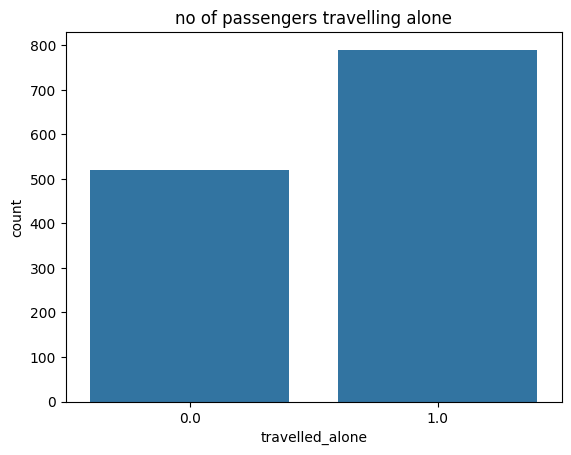

In [105]:
import matplotlib.pyplot as plt
sns.countplot(x="travelled_alone",data=df)
plt.title('no of passengers travelling alone')
plt.show;

<Axes: xlabel='survived', ylabel='count'>

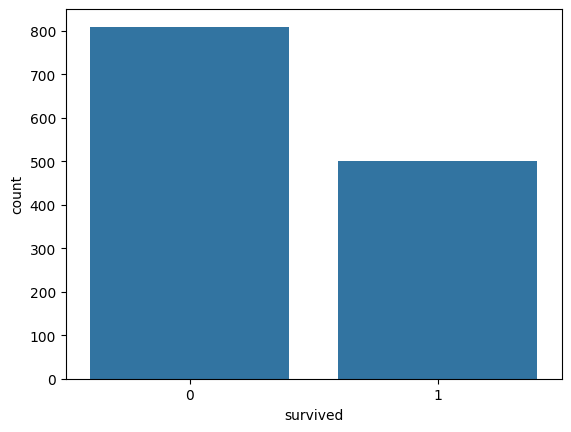

In [106]:
sns.countplot(x="survived",data=df)

<Axes: xlabel='survived', ylabel='count'>

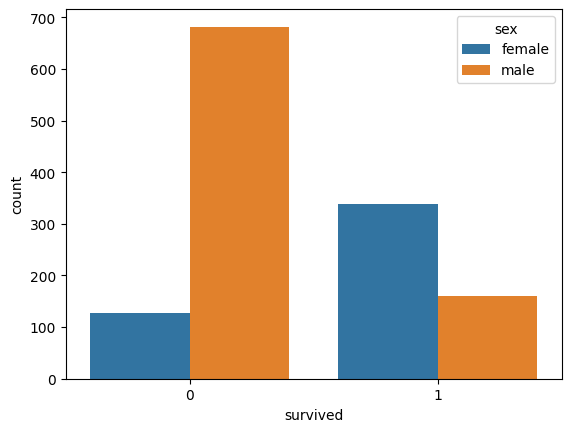

In [107]:
sns.countplot(x="survived",hue="sex",data=df)

<Axes: xlabel='survived', ylabel='count'>

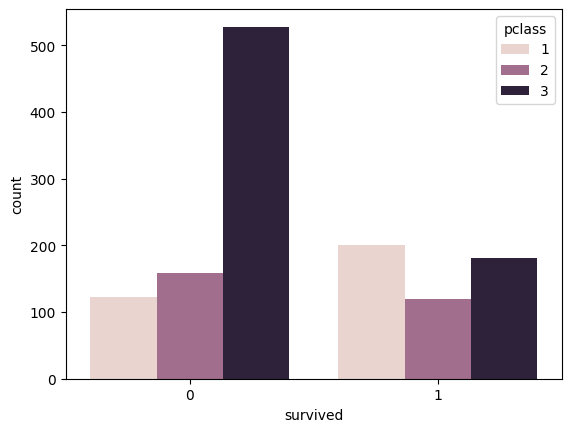

In [108]:
sns.countplot(x="survived",hue="pclass",data=df)

<Axes: ylabel='Frequency'>

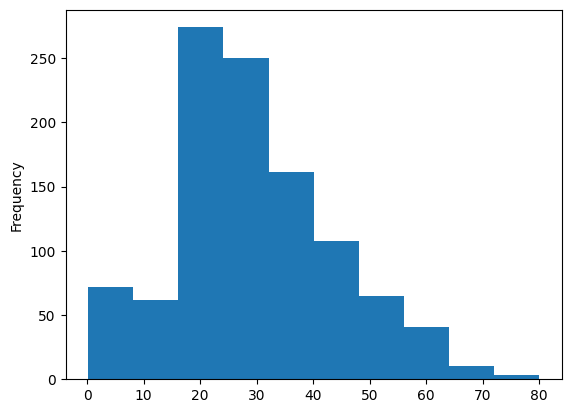

In [109]:
df['age'].plot.hist()

In [110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   pclass           1309 non-null   int64   
 1   name             1309 non-null   object  
 2   sex              1309 non-null   category
 3   age              1046 non-null   float64 
 4   ticket           1309 non-null   object  
 5   fare             1308 non-null   float64 
 6   cabin            295 non-null    object  
 7   embarked         1307 non-null   category
 8   boat             486 non-null    object  
 9   body             121 non-null    float64 
 10  home.dest        745 non-null    object  
 11  survived         1309 non-null   category
 12  family           1309 non-null   int64   
 13  travelled_alone  1309 non-null   float64 
dtypes: category(3), float64(4), int64(2), object(5)
memory usage: 116.8+ KB


In [111]:
df.isnull().sum()

,0
pclass,0
name,0
sex,0
age,263
ticket,0
fare,1
cabin,1014
embarked,2
boat,823
body,1188


<Axes: title={'center': 'Missing Values'}, ylabel='percentage'>

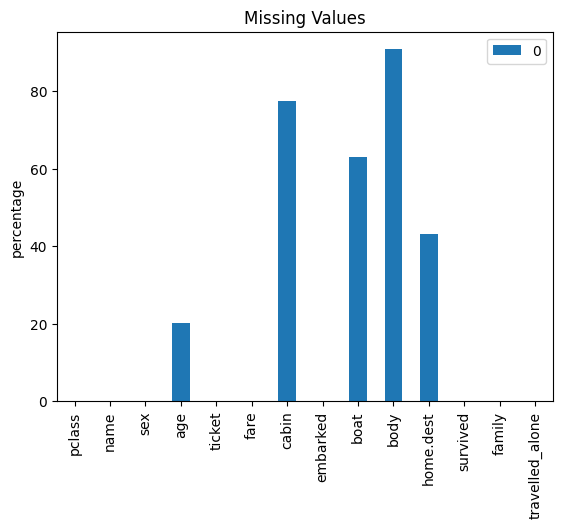

In [112]:
miss_val=pd.DataFrame(df.isnull().sum()/len(df)*100)
miss_val.plot(kind="bar",title="Missing Values",ylabel="percentage")

In [113]:
df.head()

,pclass,name,sex,age,ticket,fare,cabin,embarked,boat,body,home.dest,survived,family,travelled_alone
0,1,"Allen, Miss. Elisabeth Walton",female,29.0000,24160,211.3375,B5,S,2,NaN,"St Louis, MO",1,0,1.0
1,1,"Allison, Master. Hudson Trevor",male,0.9167,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",1,3,0.0
2,1,"Allison, Miss. Helen Loraine",female,2.0000,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",0,3,0.0
3,1,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",0,3,0.0
4,1,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",0,3,0.0


In [114]:
df.drop(['name','ticket','home.dest'],axis=1,inplace=True)

In [115]:
df.drop(['cabin','boat','body'],axis=1,inplace=True)

In [116]:
df.head()

,pclass,sex,age,fare,embarked,survived,family,travelled_alone
0,1,female,29.0000,211.3375,S,1,0,1.0
1,1,male,0.9167,151.5500,S,1,3,0.0
2,1,female,2.0000,151.5500,S,0,3,0.0
3,1,male,30.0000,151.5500,S,0,3,0.0
4,1,female,25.0000,151.5500,S,0,3,0.0


# ***VAlue imputation***

In [117]:
sex=pd.get_dummies(df['sex'],drop_first=True)
print(sex)

       male
0     False
1      True
2     False
3      True
4     False
...     ...
1304  False
1305  False
1306   True
1307   True
1308   True

[1309 rows x 1 columns]


In [118]:
df['sex']=sex
df

,pclass,sex,age,fare,embarked,survived,family,travelled_alone
0,1,False,29.0000,211.3375,S,1,0,1.0
1,1,True,0.9167,151.5500,S,1,3,0.0
2,1,False,2.0000,151.5500,S,0,3,0.0
3,1,True,30.0000,151.5500,S,0,3,0.0
4,1,False,25.0000,151.5500,S,0,3,0.0
...,...,...,...,...,...,...,...,...
1304,3,False,14.5000,14.4542,C,0,1,0.0
1305,3,False,NaN,14.4542,C,0,1,0.0
1306,3,True,26.5000,7.2250,C,0,0,1.0
1307,3,True,27.0000,7.2250,C,0,0,1.0


In [119]:
df.isnull().sum()

,0
pclass,0
sex,0
age,263
fare,1
embarked,2
survived,0
family,0
travelled_alone,0


In [120]:
from sklearn.impute import SimpleImputer
imp_mean=SimpleImputer(strategy='mean')

In [121]:
df['age']=imp_mean.fit_transform(df[['age']])
df['fare']=imp_mean.fit_transform(df[['fare']])

In [122]:
df.isnull().sum()

,0
pclass,0
sex,0
age,0
fare,0
embarked,2
survived,0
family,0
travelled_alone,0


In [123]:
imp_freq=SimpleImputer(strategy='most_frequent')
df['embarked']=imp_freq.fit_transform(df[['embarked']]).ravel()

In [124]:
df.isnull().sum()

,0
pclass,0
sex,0
age,0
fare,0
embarked,0
survived,0
family,0
travelled_alone,0


In [125]:
df.head()

,pclass,sex,age,fare,embarked,survived,family,travelled_alone
0,1,False,29.0000,211.3375,S,1,0,1.0
1,1,True,0.9167,151.5500,S,1,3,0.0
2,1,False,2.0000,151.5500,S,0,3,0.0
3,1,True,30.0000,151.5500,S,0,3,0.0
4,1,False,25.0000,151.5500,S,0,3,0.0


In [126]:
embark=pd.get_dummies(df['embarked'],drop_first=True)
df.drop(['embarked'],axis=1,inplace=True)
df=pd.concat([df,embark],axis=1)

In [127]:
df.head()

,pclass,sex,age,fare,survived,family,travelled_alone,Q,S
0,1,False,29.0000,211.3375,1,0,1.0,False,True
1,1,True,0.9167,151.5500,1,3,0.0,False,True
2,1,False,2.0000,151.5500,0,3,0.0,False,True
3,1,True,30.0000,151.5500,0,3,0.0,False,True
4,1,False,25.0000,151.5500,0,3,0.0,False,True


In [128]:
x=df.drop(['survived'],axis=1)#input data
y=df['survived']#output data

In [130]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)

In [131]:
print(x_train.shape,y_train.shape)
print(x_test.shape,y_train.shape)

(916, 8) (916,)
(393, 8) (916,)


In [132]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(x_train,y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [133]:
pred=model.predict(x_test)

In [134]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,pred)

0.7964376590330788

In [135]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,pred)

array([[204,  32],
       [ 48, 109]])